In [7]:
import os
import pickle
import random
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
from sklearn.decomposition import PCA

In [3]:
dataset_list = sorted(
    dataset for dataset in os.listdir('../dataset_barycenter') if dataset.split('_')[-1] == 'mean.pkl')
n = len(dataset_list)
distances = np.zeros((n, n))

In [4]:
for i, dataset1 in enumerate(dataset_list):
    with open(os.path.join('../dataset_barycenter', dataset1), 'rb') as f:
        mean1 = pickle.load(f)
    for j, dataset2 in enumerate(dataset_list):
        with open(os.path.join('../dataset_barycenter', dataset2), 'rb') as f:
            mean2 = pickle.load(f)
        distances[i, j] = F.pairwise_distance(mean1.unsqueeze(dim=0), mean2.unsqueeze(dim=0))

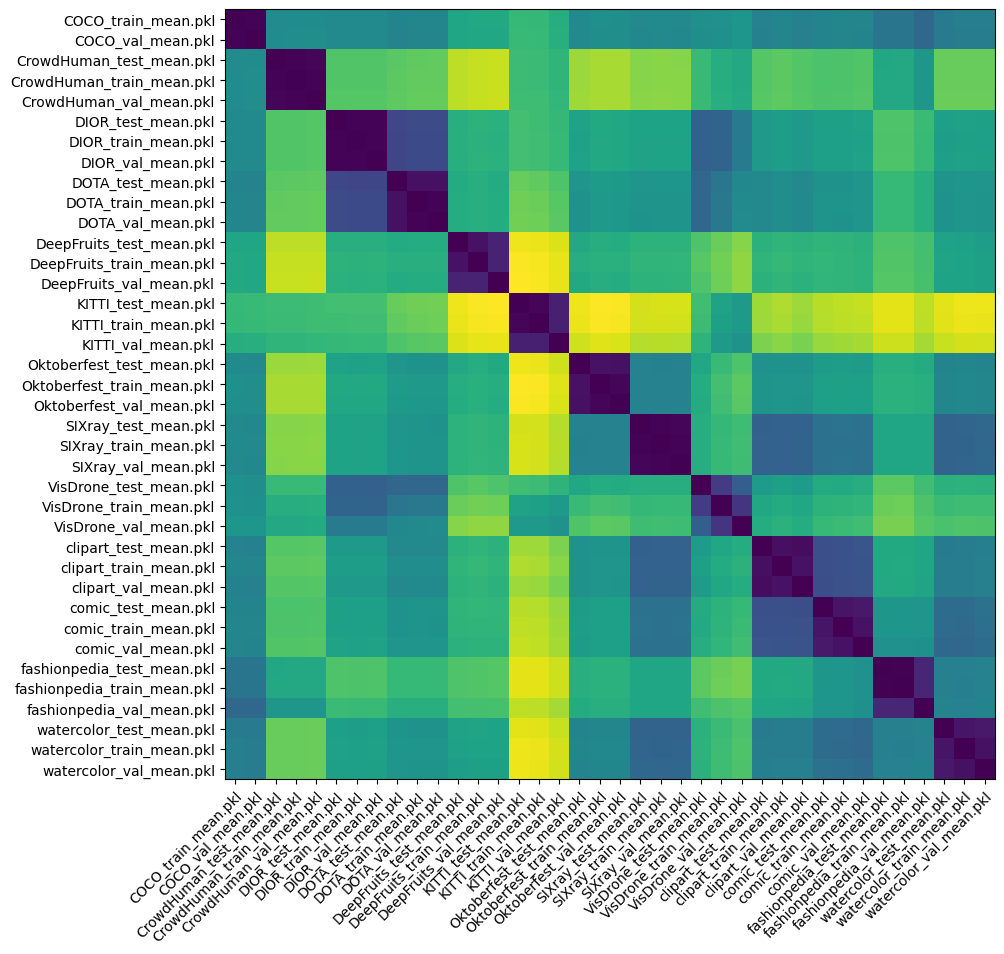

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
im = ax.imshow(distances)

ax.set_xticks(np.arange(n), labels=dataset_list)
ax.set_yticks(np.arange(n), labels=dataset_list)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.show()

In [6]:


number_of_colors = 13

color = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
         for i in range(number_of_colors)]

dataset_names = ['COCO', 'CrowdHuman', 'DIOR', 'DOTA', 'DeepFruits', 'KITTI', 'Oktoberfest', 'SIXray', 'VisDrone',
                 'clipart', 'comic', 'fashionpedia', 'watercolor']

colors_dict = {}
for c, dn in zip(color, dataset_names):
    colors_dict[dn] = c

print(colors_dict)

{'COCO': '#20F761', 'CrowdHuman': '#ECC2BF', 'DIOR': '#F901FD', 'DOTA': '#DF8575', 'DeepFruits': '#8A0F04', 'KITTI': '#7E6FD4', 'Oktoberfest': '#92C2AB', 'SIXray': '#EF5284', 'VisDrone': '#44661D', 'clipart': '#837202', 'comic': '#A0379C', 'fashionpedia': '#1C51B9', 'watercolor': '#C738D5'}


In [7]:
colors_dict = {'COCO': '#9D6FD7',
               'CrowdHuman': '#E6C8C7',
               'DIOR': '#003A37',
               'DOTA': '#8AFF66',
               'DeepFruits': '#284D26',
               'KITTI': '#F65794',
               'Oktoberfest': '#804E96',
               'SIXray': '#C05E5A',
               'VisDrone': '#458BBC',
               'clipart': '#C83F0F',
               'comic': '#3C7503',
               'fashionpedia': '#3B9F21',
               'watercolor': '#E68C70'}

In [8]:
dataset_features = []
for dataset in dataset_list:
    with open(os.path.join('../dataset_barycenter', dataset), 'rb') as f:
        mean = pickle.load(f)
    dataset_features.append(mean.cpu().numpy())

In [9]:
dataset_features = np.array(dataset_features)
dataset_features.shape

(38, 1024)

In [10]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(dataset_features)
pca_features.shape

(38, 3)

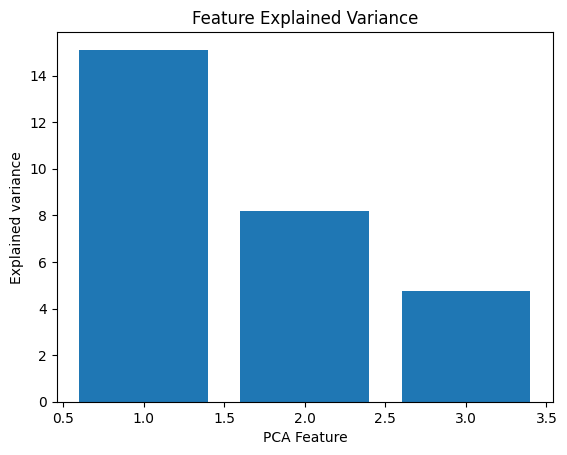

In [11]:
plt.bar(
    range(1, len(pca.explained_variance_) + 1),
    pca.explained_variance_
)

plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

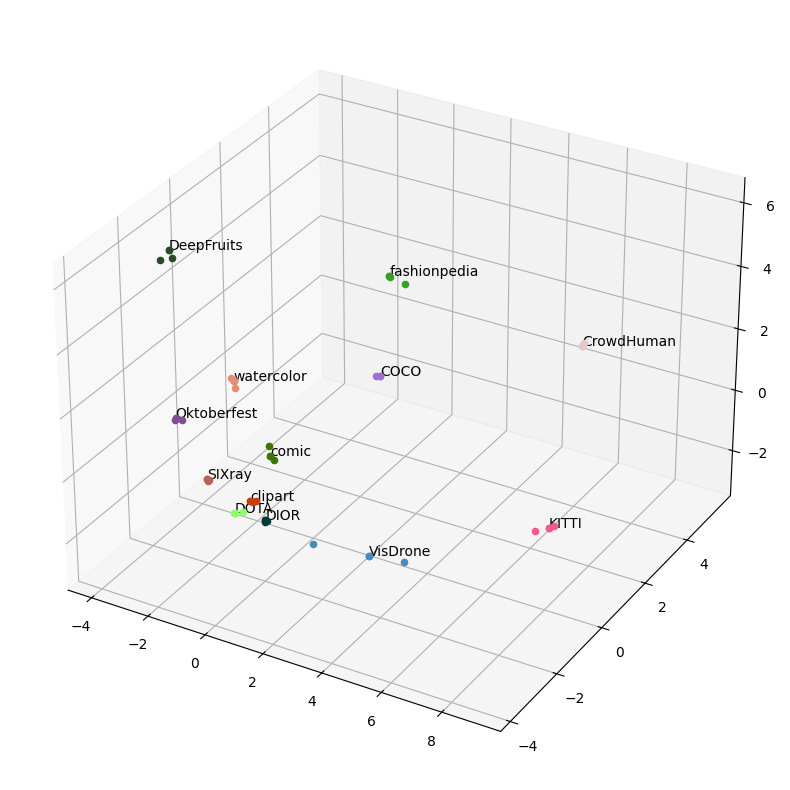

In [12]:
%matplotlib inline

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(10, 10)

for i, dataset in enumerate(dataset_list):

    ax.scatter(pca_features[i, 0], pca_features[i, 1], pca_features[i, 2], color=colors_dict[dataset.split('_')[0]])
    if dataset.split('_')[1] == 'train':
        ax.scatter(pca_features[i, 0], pca_features[i, 1], pca_features[i, 2], color=colors_dict[dataset.split('_')[0]])
        ax.text(pca_features[i, 0], pca_features[i, 1], pca_features[i, 2], dataset.split('_')[0])

plt.show()

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(dataset_features)
pca_features.shape

(38, 2)

In [14]:
dataset_list

['COCO_train_mean.pkl',
 'COCO_val_mean.pkl',
 'CrowdHuman_test_mean.pkl',
 'CrowdHuman_train_mean.pkl',
 'CrowdHuman_val_mean.pkl',
 'DIOR_test_mean.pkl',
 'DIOR_train_mean.pkl',
 'DIOR_val_mean.pkl',
 'DOTA_test_mean.pkl',
 'DOTA_train_mean.pkl',
 'DOTA_val_mean.pkl',
 'DeepFruits_test_mean.pkl',
 'DeepFruits_train_mean.pkl',
 'DeepFruits_val_mean.pkl',
 'KITTI_test_mean.pkl',
 'KITTI_train_mean.pkl',
 'KITTI_val_mean.pkl',
 'Oktoberfest_test_mean.pkl',
 'Oktoberfest_train_mean.pkl',
 'Oktoberfest_val_mean.pkl',
 'SIXray_test_mean.pkl',
 'SIXray_train_mean.pkl',
 'SIXray_val_mean.pkl',
 'VisDrone_test_mean.pkl',
 'VisDrone_train_mean.pkl',
 'VisDrone_val_mean.pkl',
 'clipart_test_mean.pkl',
 'clipart_train_mean.pkl',
 'clipart_val_mean.pkl',
 'comic_test_mean.pkl',
 'comic_train_mean.pkl',
 'comic_val_mean.pkl',
 'fashionpedia_test_mean.pkl',
 'fashionpedia_train_mean.pkl',
 'fashionpedia_val_mean.pkl',
 'watercolor_test_mean.pkl',
 'watercolor_train_mean.pkl',
 'watercolor_val_mean.

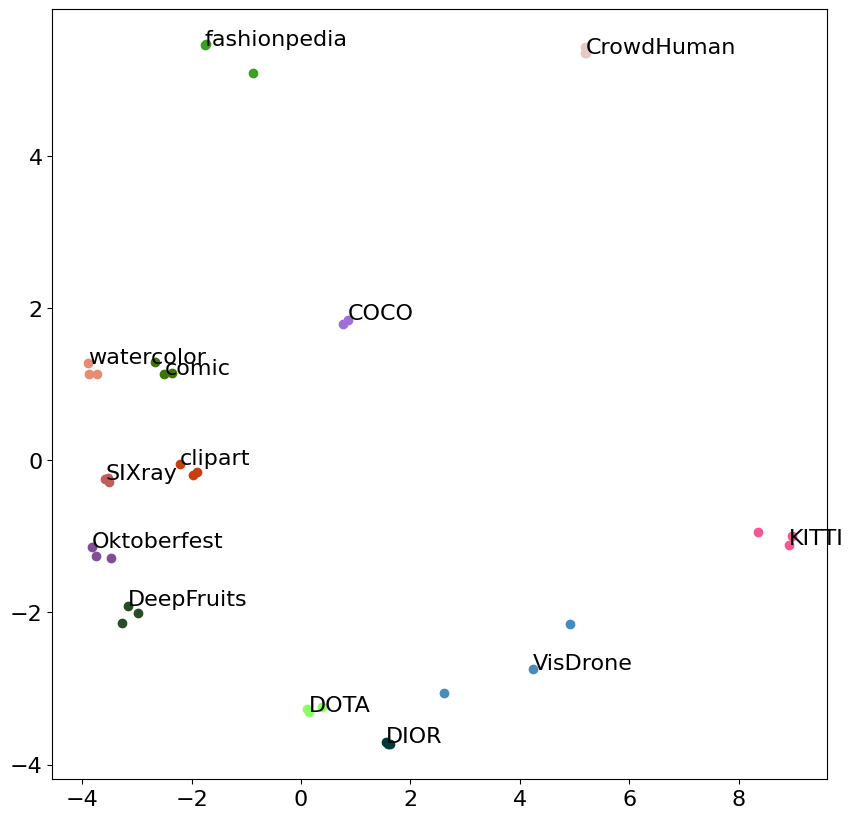

In [15]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

for i, dataset in enumerate(dataset_list):

    if dataset.split('_')[1] != 'train':
        ax.scatter(pca_features[i, 0], pca_features[i, 1], color=colors_dict[dataset.split('_')[0]])
    else:
        ax.scatter(pca_features[i, 0], pca_features[i, 1], color=colors_dict[dataset.split('_')[0]])
        ax.text(pca_features[i, 0], pca_features[i, 1], dataset.split('_')[0])

plt.show()

In [16]:
dataset_list = sorted(os.listdir('../class_barycenter'))
distances = {}

In [17]:
for dataset in dataset_list:
    classes = [x for x in sorted(os.listdir(os.path.join('../class_barycenter', dataset)),
                                 key=lambda item: (int(item.partition('_')[0])
                                                   if item[0].isdigit() else float('inf'), item))
               if x[-5] == 'n']
    distances[dataset] = np.zeros((len(classes), len(classes)))
    for i, class1 in enumerate(classes):
        with open(os.path.join('../class_barycenter', dataset, class1), 'rb') as f:
            mean1 = pickle.load(f)
        for j, class2 in enumerate(classes):
            with open(os.path.join('../class_barycenter', dataset, class2), 'rb') as f:
                mean2 = pickle.load(f)
            distances[dataset][i, j] = F.pairwise_distance(mean1.unsqueeze(dim=0), mean2.unsqueeze(dim=0))

In [18]:
dataset_list

['COCO_train',
 'COCO_val',
 'CrowdHuman_test',
 'CrowdHuman_train',
 'CrowdHuman_val',
 'DIOR_test',
 'DIOR_train',
 'DIOR_val',
 'DOTA_test',
 'DOTA_train',
 'DOTA_val',
 'DeepFruits_test',
 'DeepFruits_train',
 'DeepFruits_val',
 'KITTI_test',
 'KITTI_train',
 'KITTI_val',
 'Oktoberfest_test',
 'Oktoberfest_train',
 'Oktoberfest_val',
 'SIXray_test',
 'SIXray_train',
 'SIXray_val',
 'VisDrone_test',
 'VisDrone_train',
 'VisDrone_val',
 'clipart_test',
 'clipart_train',
 'clipart_val',
 'comic_test',
 'comic_train',
 'comic_val',
 'fashionpedia_test',
 'fashionpedia_train',
 'fashionpedia_val',
 'watercolor_test',
 'watercolor_train',
 'watercolor_val']

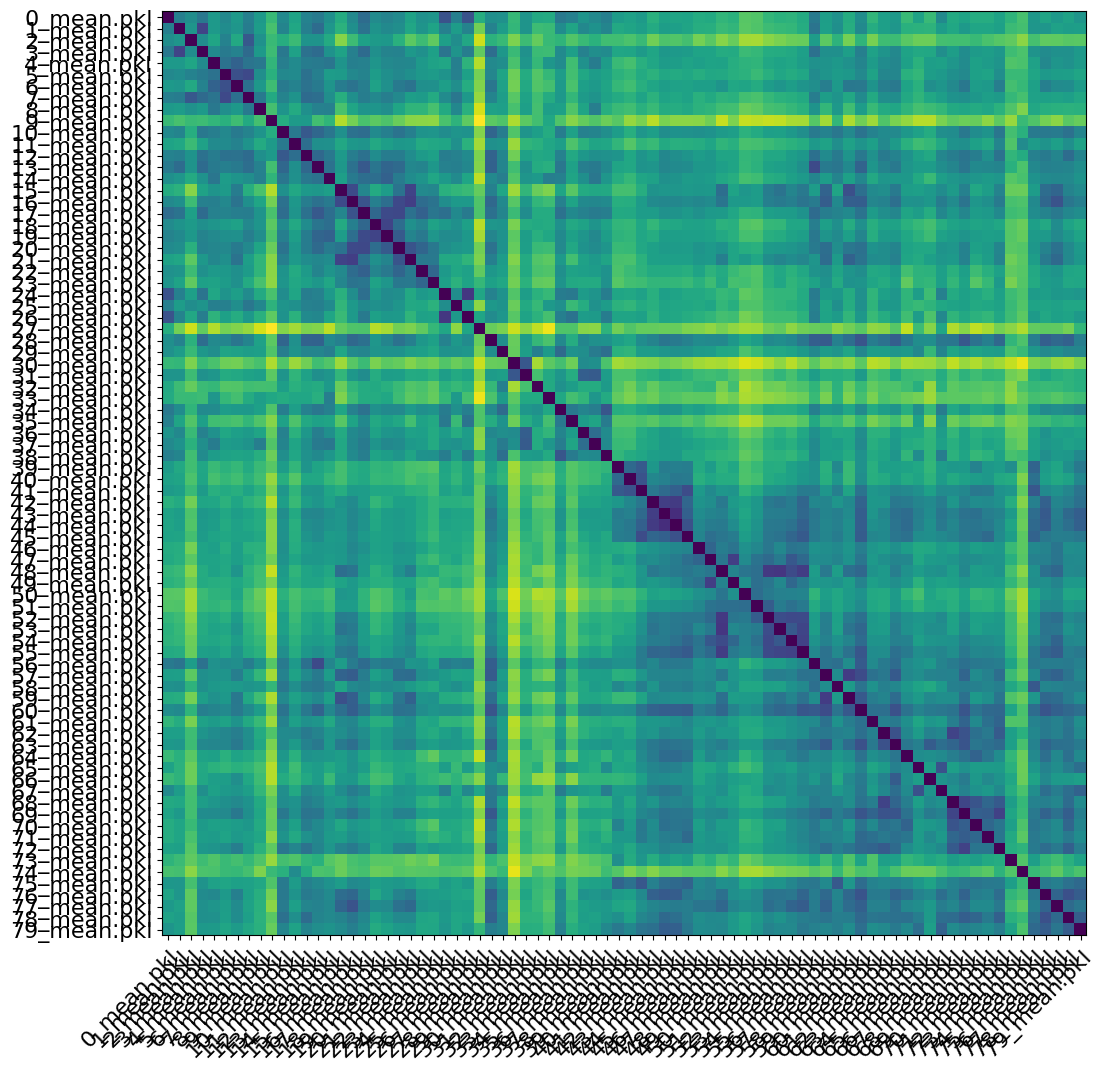

In [19]:
dataset = 'COCO_train'
classes = [x for x in sorted(os.listdir(os.path.join('../class_barycenter', dataset)),
                             key=lambda item: (int(item.partition('_')[0])
                                               if item[0].isdigit() else float('inf'), item))
           if x[-5] == 'n']
n = len(classes)

fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
im = ax.imshow(distances[dataset])

ax.set_xticks(np.arange(n), labels=classes)
ax.set_yticks(np.arange(n), labels=classes)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.show()

In [20]:
features = []
names = []
# for dataset in dataset_list:
for dataset in ['COCO_train']:
    classes = [x for x in sorted(os.listdir(os.path.join('../class_barycenter', dataset)),
                                 key=lambda item: (int(item.partition('_')[0])
                                                   if item[0].isdigit() else float('inf'), item))
               if x[-5] == 'n']
    for class_id in classes:
        with open(os.path.join('../class_barycenter', dataset, class_id), 'rb') as f:
            mean = pickle.load(f)
        features.append(mean.cpu().numpy())
        names.append(dataset + class_id)

In [21]:
features = np.array(features)
features.shape

(80, 1024)

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_features = pca.fit_transform(features)
pca_features.shape

(80, 3)

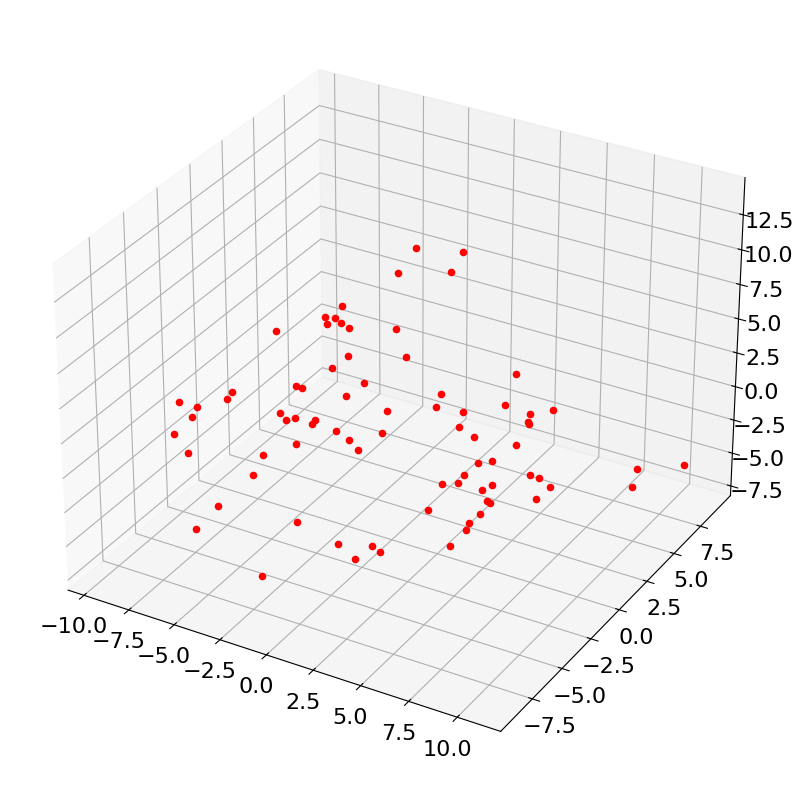

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(10, 10)

for i, class_id in enumerate(classes):
    ax.scatter(pca_features[i, 0], pca_features[i, 1], pca_features[i, 2], color='r')

plt.show()

In [24]:
import matplotlib.pyplot as plt
import random

number_of_colors = 13

color = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
         for i in range(number_of_colors)]

dataset_names = ['COCO', 'CrowdHuman', 'DIOR', 'DOTA', 'DeepFruits', 'KITTI', 'Oktoberfest', 'SIXray', 'VisDrone',
                 'clipart', 'comic', 'fashionpedia', 'watercolor']

colors_dict = {}
for c, dn in zip(color, dataset_names):
    colors_dict[dn] = c

print(colors_dict)

{'COCO': '#F141C3', 'CrowdHuman': '#251DD0', 'DIOR': '#1269E5', 'DOTA': '#C06A80', 'DeepFruits': '#44CEB2', 'KITTI': '#D53413', 'Oktoberfest': '#75576E', 'SIXray': '#73FDC4', 'VisDrone': '#76AED6', 'clipart': '#33920E', 'comic': '#87D3EC', 'fashionpedia': '#D089AD', 'watercolor': '#EE2A9F'}


In [25]:
features = []
names = []
for dataset in dataset_list:
    classes = [x for x in sorted(os.listdir(os.path.join('../class_barycenter', dataset)),
                                 key=lambda item: (int(item.partition('_')[0])
                                                   if item[0].isdigit() else float('inf'), item))
               if x[-5] == 'n']
    for class_id in classes:
        with open(os.path.join('../class_barycenter', dataset, class_id), 'rb') as f:
            mean = pickle.load(f)
        features.append(mean.cpu().numpy())
        names.append(dataset + class_id)

In [26]:
names = [name.split('_')[0] for name in names]

In [27]:
features = np.array(features)
features.shape

(625, 1024)

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_features = pca.fit_transform(features)
pca_features.shape

(625, 3)

In [29]:
colors_dict = {'COCO': '#e6194B',
               'CrowdHuman': '#fabed4',
               'DIOR': '#bfef45',
               'DOTA': '#3cb44b',
               'DeepFruits': '#dcbeff',
               'KITTI': '#911eb4',
               'Oktoberfest': '#9a6324',
               'SIXray': '#f58231',
               'VisDrone': '#aaffc3',
               'clipart': '#4363d8',
               'comic': '#42d4f4',
               'fashionpedia': '#f032e6',
               'watercolor': '#469990'}

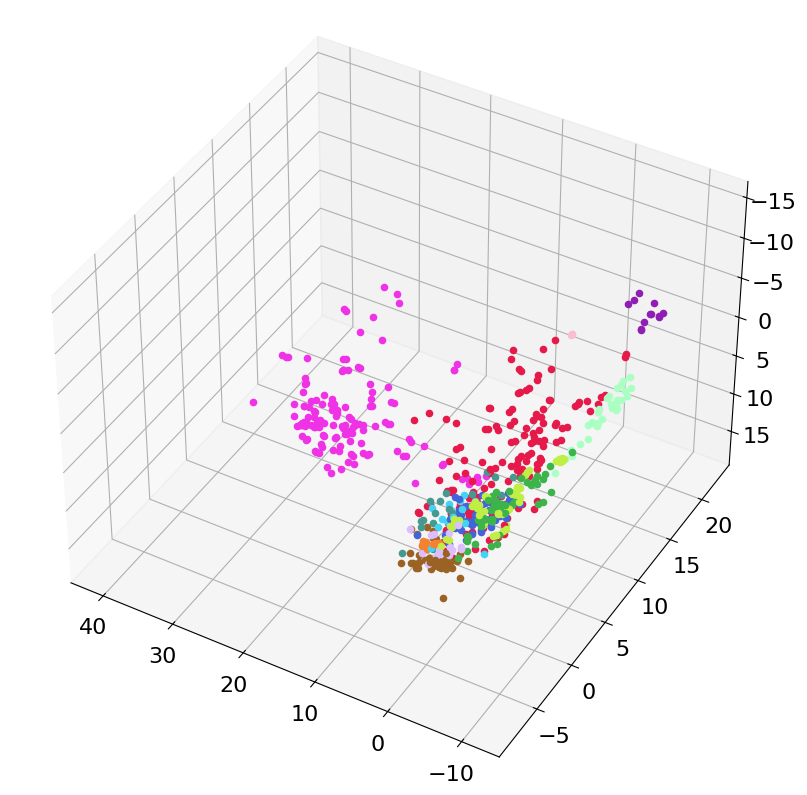

In [30]:
# % matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(-140, 60)
fig.set_size_inches(10, 10)

visited = []

for i in range(pca_features.shape[0]):
    ax.scatter(pca_features[i, 0], pca_features[i, 1], pca_features[i, 2], color=colors_dict[names[i].split('_')[0]],
               label=names[i].split('_')[0])

handles, labels = ax.get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)

# ax.legend(handle_list, label_list)
plt.show()

In [31]:
features = []
names = []
for dataset in dataset_list:
    classes = [x for x in sorted(os.listdir(os.path.join('../class_barycenter', dataset)),
                                 key=lambda item: (int(item.partition('_')[0])
                                                   if item[0].isdigit() else float('inf'), item))
               if x[-5] == 'n']
    for class_id in classes:
        with open(os.path.join('../class_barycenter', dataset, class_id), 'rb') as f:
            mean = pickle.load(f)
        features.append(mean.cpu().numpy())
        names.append(dataset + class_id)

In [32]:
names = [name.split('_')[0] for name in names]

In [33]:
features = np.array(features)
features.shape

(625, 1024)

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_features = pca.fit_transform(features)
pca_features.shape

(625, 3)

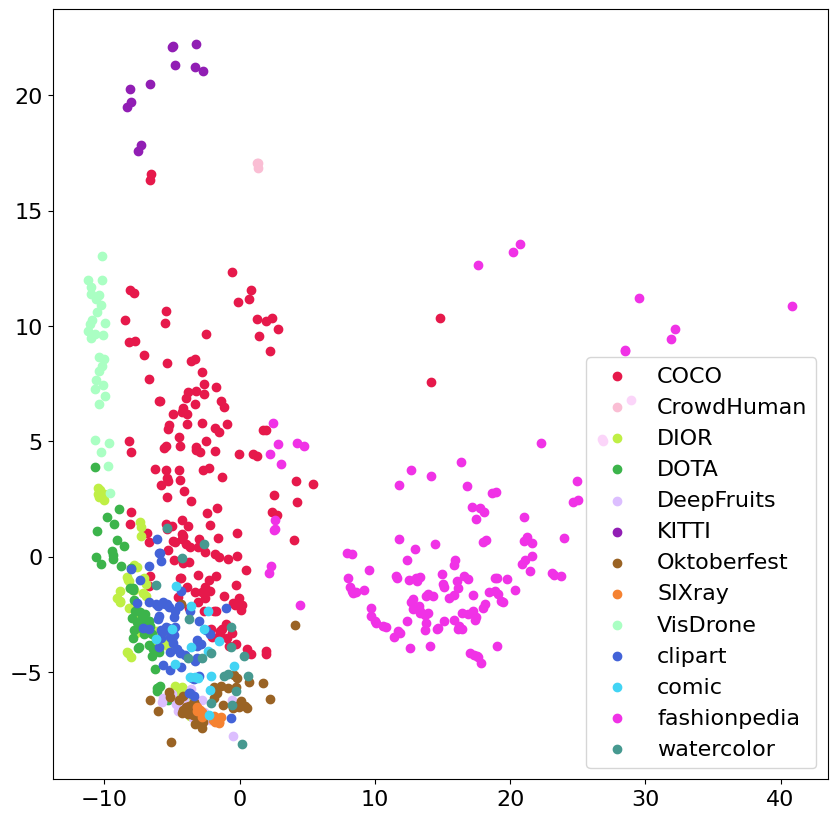

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

visited = []

for i in range(pca_features.shape[0]):
    ax.scatter(pca_features[i, 0], pca_features[i, 1], color=colors_dict[names[i]], label=names[i])

handles, labels = ax.get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)

ax.legend(handle_list, label_list)
plt.show()

In [36]:
dataset = 'COCO_train'

dataset_features = []
dataset_names = []

with open(os.path.join('../dataset_features', dataset, 'mean.pkl_mean.pkl'), 'rb') as f:
    mean = pickle.load(f)
dataset_features.append(mean.cpu().numpy())
for i in range(10):
    with open(os.path.join('../dataset_features', dataset, str(i) + '.pkl'), 'rb') as f:
        image_f = pickle.load(f)
    dataset_features.append(image_f.squeeze().cpu().numpy())

dataset_features = np.array(dataset_features)
dataset_features.shape

(11, 1024)

In [37]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(dataset_features)
pca_features.shape

(11, 3)

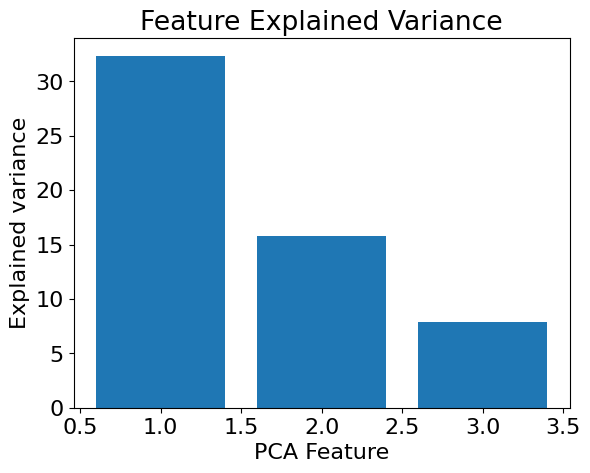

In [38]:
plt.bar(
    range(1, len(pca.explained_variance_) + 1),
    pca.explained_variance_
)

plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

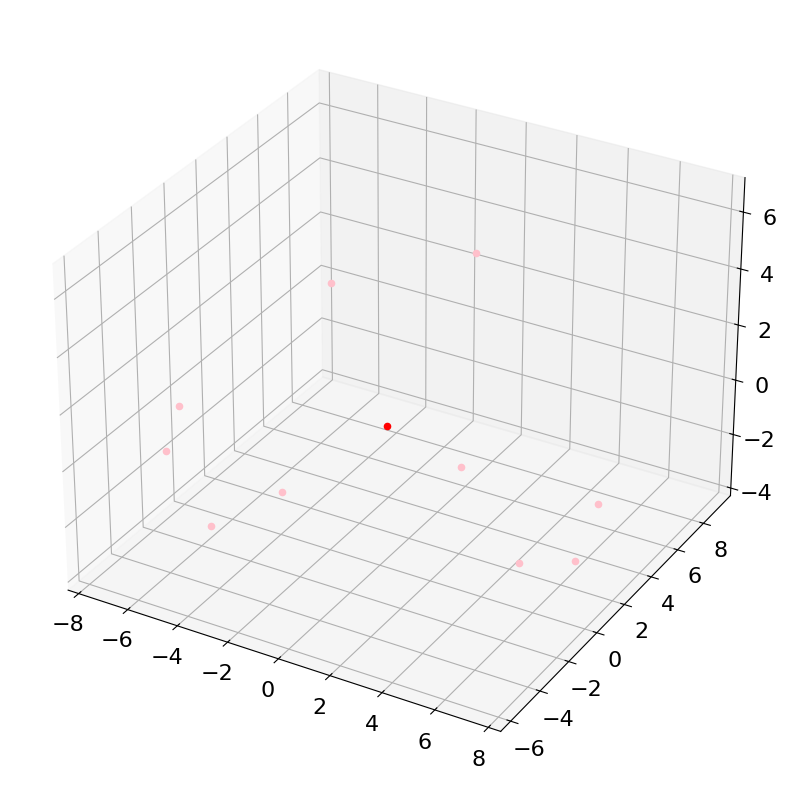

In [39]:
# %matplotlib qt

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(10, 10)

ax.scatter(pca_features[0, 0], pca_features[0, 1], pca_features[0, 2], color='r')
for i in range(1, 11):
    ax.scatter(pca_features[i, 0], pca_features[i, 1], pca_features[i, 2], color='pink')

plt.show()

In [64]:
dataset = 'DOTA_train'

class_features = []
class_number = []

classes = os.listdir(os.path.join('../class_features', dataset))
for c in classes:
    with open(os.path.join('../class_features', dataset, c, 'mean.pkl'), 'rb') as f:
        mean = pickle.load(f)
    class_features.append(mean.cpu().numpy())
    class_number.append(-1)
    for i in range(10):
        with open(os.path.join('../class_features', dataset, c, str(i) + '.pkl'), 'rb') as f:
            image_f = pickle.load(f)
        class_features.append(image_f.squeeze().cpu().numpy())
        class_number.append(c)

class_features = np.array(class_features)
class_features.shape

(176, 1024)

In [65]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(class_features)
pca_features.shape

(176, 2)

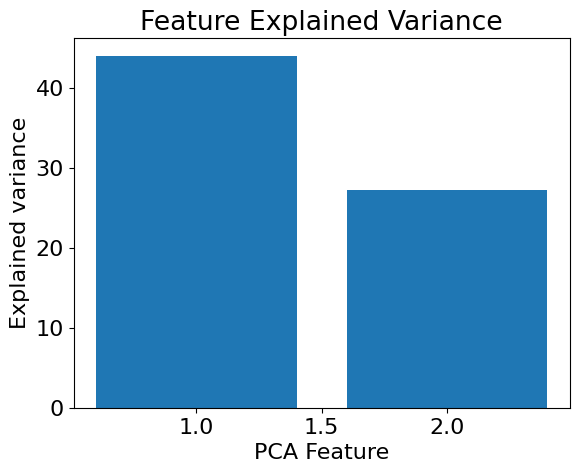

In [66]:
%matplotlib inline
plt.bar(
    range(1, len(pca.explained_variance_) + 1),
    pca.explained_variance_
)

plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [67]:
nb_classes = len(list(set(class_number))) - 1
colors_dict = {}

color = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
         for i in range(nb_classes)]

for c in range(nb_classes):
    colors_dict[c] = color[c]

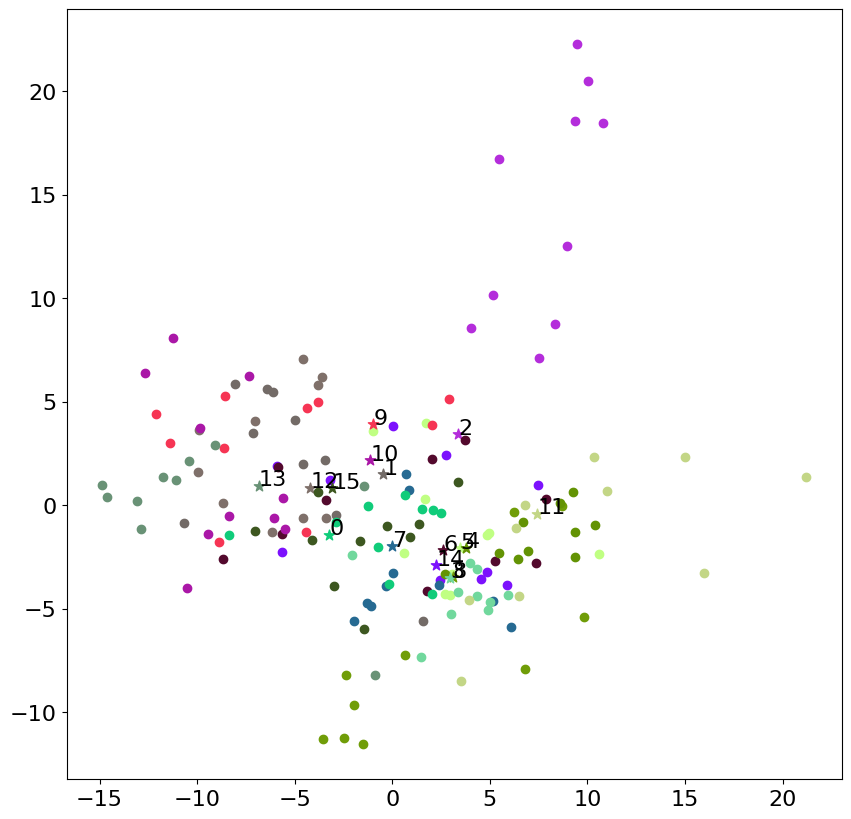

In [68]:
# %matplotlib inline

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

for i, c in enumerate(class_number):
    if c == -1:
        ax.scatter(pca_features[i, 0], pca_features[i, 1], color=colors_dict[int(class_number[i + 1])], marker='*',
                   s=60)
        ax.text(pca_features[i, 0], pca_features[i, 1], int(class_number[i + 1]))
    else:
        ax.scatter(pca_features[i, 0], pca_features[i, 1], color=colors_dict[int(c)])

plt.show()

In [70]:
pca = PCA(n_components=0.99, svd_solver='full')
pca_features = pca.fit_transform(class_features)
pca_features.shape

(176, 110)

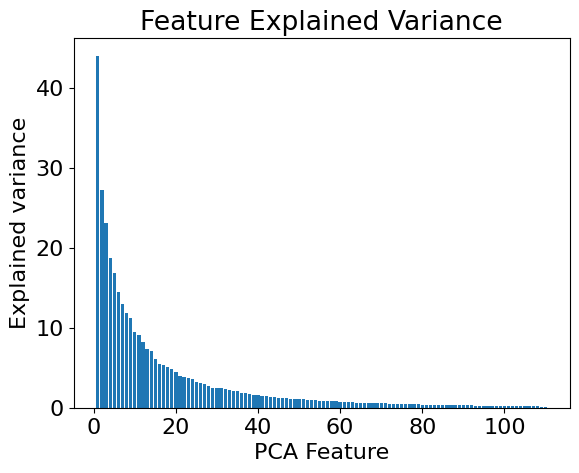

In [71]:
plt.bar(
    range(1, len(pca.explained_variance_) + 1),
    pca.explained_variance_
)

plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [72]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(pca_features)
pca_features.shape

(176, 2)

In [73]:
nb_classes = len(list(set(class_number))) - 1
colors_dict = {}

color = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
         for i in range(nb_classes)]

for c in range(nb_classes):
    colors_dict[c] = color[c]

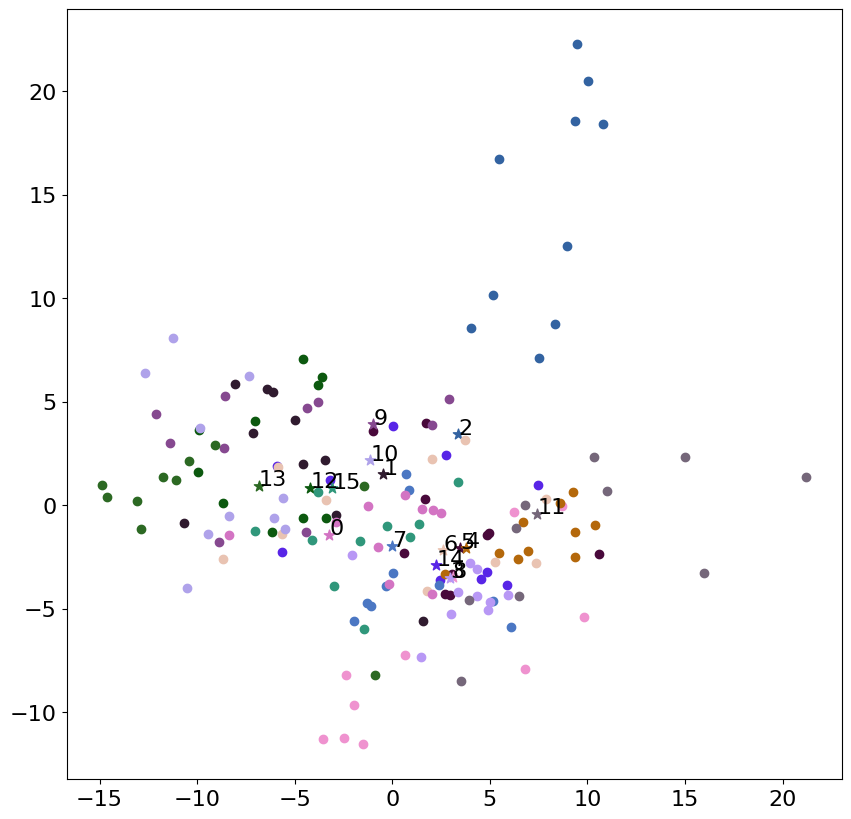

In [74]:
# %matplotlib inline

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

for i, c in enumerate(class_number):
    if c == -1:
        ax.scatter(pca_features[i, 0], pca_features[i, 1], color=colors_dict[int(class_number[i + 1])], marker='*',
                   s=60)
        ax.text(pca_features[i, 0], pca_features[i, 1], int(class_number[i + 1]))
    else:
        ax.scatter(pca_features[i, 0], pca_features[i, 1], color=colors_dict[int(c)])

plt.show()

In [75]:
dataset = 'DOTA_train'

class_features = []
class_number = []

classes = os.listdir(os.path.join('../class_features', dataset))

c = '11'
with open(os.path.join('../class_features', dataset, c, 'mean.pkl'), 'rb') as f:
    mean = pickle.load(f)
class_features.append(mean.cpu().numpy())
class_number.append(-1)
for i in range(10):
    with open(os.path.join('../class_features', dataset, c, str(i) + '.pkl'), 'rb') as f:
        image_f = pickle.load(f)
    class_features.append(image_f.squeeze().cpu().numpy())
    class_number.append(c)

In [76]:
class_features = np.array(class_features)
class_features.shape

(11, 1024)

In [77]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(class_features)
pca_features.shape

(11, 2)

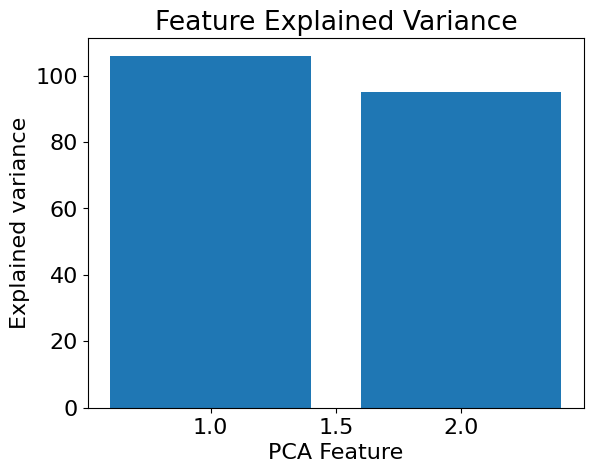

In [78]:
plt.bar(
    range(1, len(pca.explained_variance_) + 1),
    pca.explained_variance_
)

plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

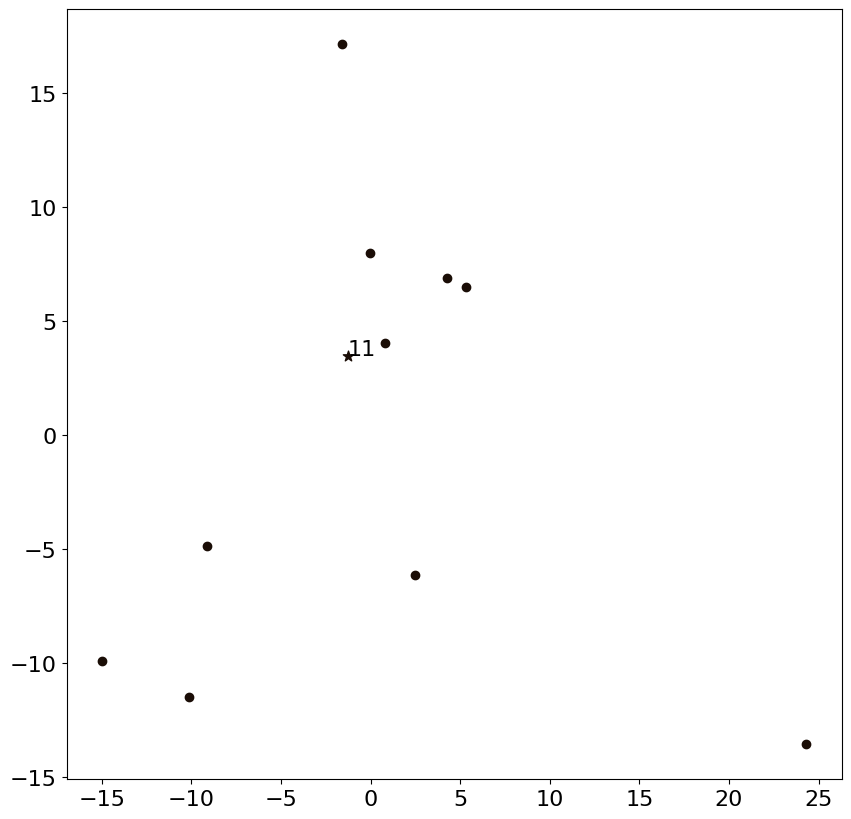

In [79]:
nb_classes = len(list(set(class_number))) - 1
colors_dict = {}

color = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
         for i in range(nb_classes)]

for _ in range(nb_classes):
    colors_dict[11] = color[0]

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

for i, c in enumerate(class_number):
    if c == -1:
        ax.scatter(pca_features[i, 0], pca_features[i, 1], color=colors_dict[int(class_number[i + 1])], marker='*',
                   s=60)
        ax.text(pca_features[i, 0], pca_features[i, 1], int(class_number[i + 1]))
    else:
        ax.scatter(pca_features[i, 0], pca_features[i, 1], color=colors_dict[int(c)])

plt.show()

In [118]:
pca_features.shape

(11, 2)

In [82]:
class_features[1:].shape

(10, 1024)

In [119]:
from sklearn.mixture import BayesianGaussianMixture

bgmm = BayesianGaussianMixture()
bgmm.fit(pca_features[1:])

BayesianGaussianMixture()

In [140]:
covariance = bgmm.covariances_[0]
mean = bgmm.means_[0]

np.linalg.eigh(covariance)[0]

array([86.8634392 , 97.96718756])

In [147]:
mean

array([ 0.12632059, -0.34859891])

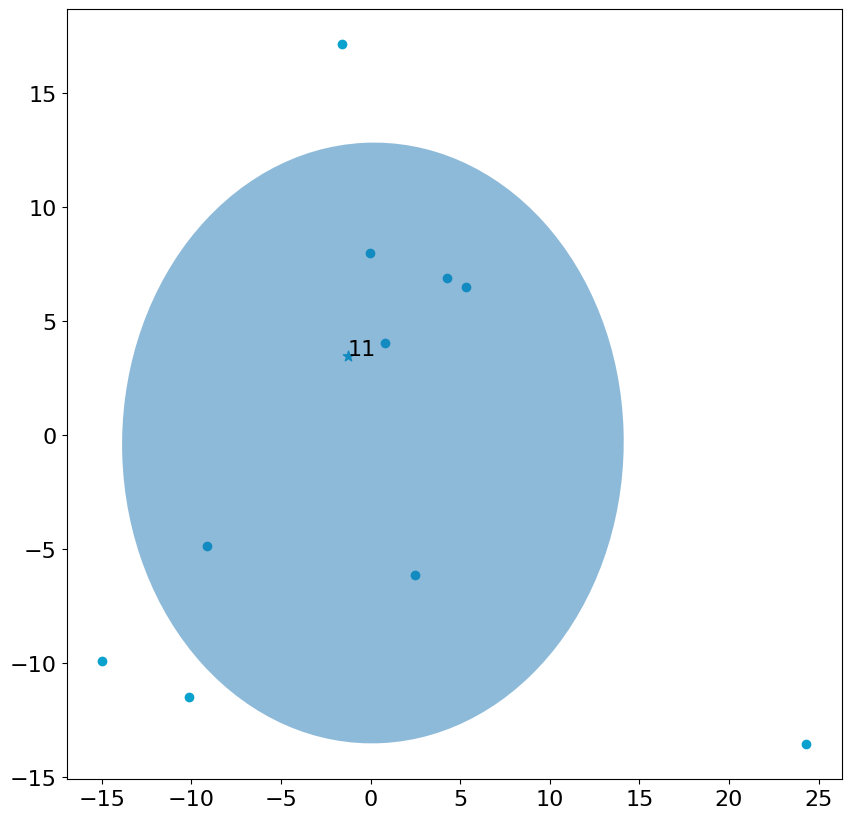

In [158]:
import matplotlib

nb_classes = len(list(set(class_number))) - 1
colors_dict = {}

color = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
         for i in range(nb_classes)]

for _ in range(nb_classes):
    colors_dict[11] = color[0]

fig, ax = plt.subplots()
splot = plt.subplot()
fig.set_size_inches(10, 10)

for i, c in enumerate(class_number):
    if c == -1:
        ax.scatter(pca_features[i, 0], pca_features[i, 1], color=colors_dict[int(class_number[i + 1])], marker='*',
                   s=60)
        ax.text(pca_features[i, 0], pca_features[i, 1], int(class_number[i + 1]))
    else:
        ax.scatter(pca_features[i, 0], pca_features[i, 1], color=colors_dict[int(c)])

v, w = np.linalg.eigh(covariance)
v = 2.0 * np.sqrt(2.0) * np.sqrt(v)

u = w[0] / np.linalg.norm(w[0])
angle = np.arctan(u[1] / u[0])
angle = 180.0 * angle / np.pi
ell = matplotlib.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle)
ell.set_clip_box(splot.bbox)
ell.set_alpha(0.5)
splot.add_artist(ell)

plt.show()

In [117]:
pca_features

array([[-1.2632029e+00,  3.4859767e+00],
       [-1.6286246e-02,  7.9815760e+00],
       [ 4.2416801e+00,  6.8725877e+00],
       [ 2.4321436e+01, -1.3569979e+01],
       [-9.1242619e+00, -4.8730731e+00],
       [-1.5928370e+00,  1.7148155e+01],
       [-1.0147981e+01, -1.1515226e+01],
       [ 8.0784279e-01,  4.0214796e+00],
       [ 2.4513962e+00, -6.1197877e+00],
       [ 5.3154759e+00,  6.4858160e+00],
       [-1.4993259e+01, -9.9175377e+00]], dtype=float32)

In [197]:
dataset = 'DOTA_train'

class_features = []
class_number = []

classes = os.listdir(os.path.join('../class_features', dataset))

c = '15'
with open(os.path.join('../DOTA_train', c, 'mean.pkl'), 'rb') as f:
    mean = pickle.load(f)
class_features.append(mean.cpu().numpy())
class_number.append(-1)

load_path = os.path.join('../DOTA_train', c, c + '.pth')
image_features = torch.load(load_path)

for i, img_f in enumerate(image_features):
    class_features.append(img_f.squeeze().cpu().numpy())
    if i in range(10):
        class_number.append(0)
    else:
        class_number.append(c)

In [198]:
class_features = np.array(class_features)
class_features.shape

(559, 1024)

In [199]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(class_features)
pca_features.shape

(559, 2)

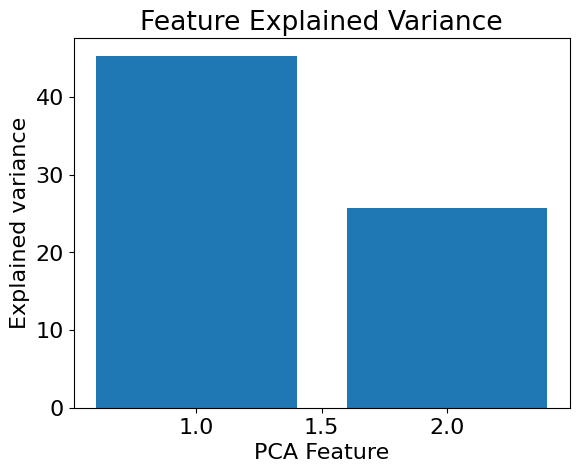

In [200]:
plt.bar(
    range(1, len(pca.explained_variance_) + 1),
    pca.explained_variance_
)
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [201]:
colors_dict

{11: '#4A366D'}

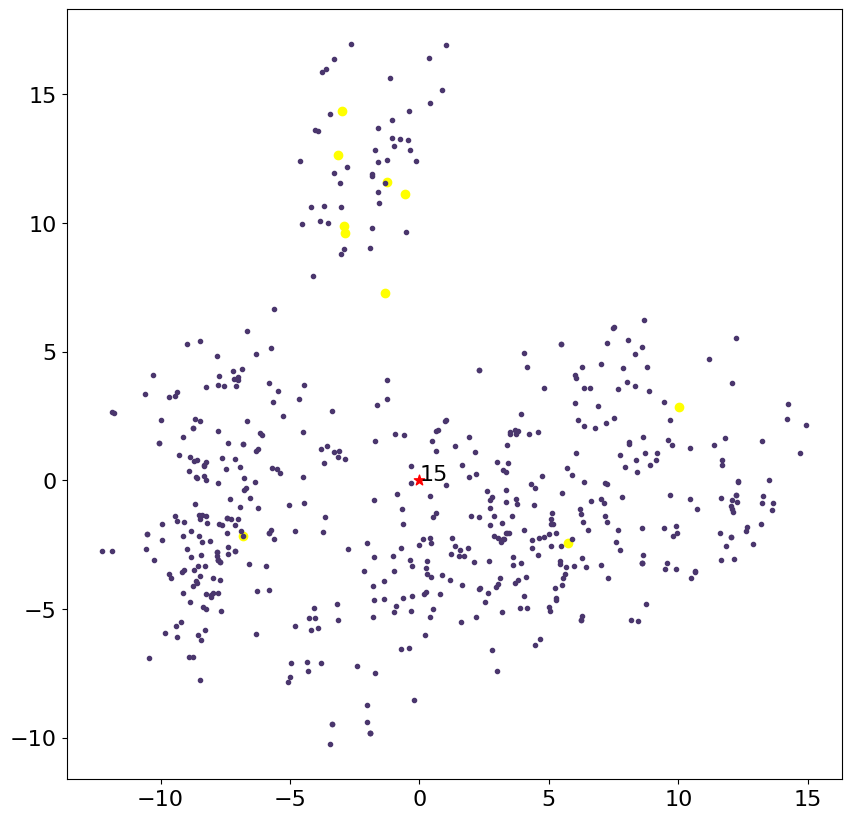

In [203]:
color = '#4A366D'

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

for i, c in enumerate(class_number):
    if c == -1:
        ax.scatter(pca_features[i, 0], pca_features[i, 1], color='red', marker='*',
                   s=60)
        ax.text(pca_features[i, 0], pca_features[i, 1], int(15))
    elif c == 0:
        ax.scatter(pca_features[i, 0], pca_features[i, 1], color='yellow', marker='o')
    else:
        ax.scatter(pca_features[i, 0], pca_features[i, 1], color=color, marker='.')

plt.show()

In [204]:
fig.savefig('output15.pdf')

In [205]:
pca_features[1:].shape

(558, 2)

In [206]:
bgmm = BayesianGaussianMixture()
bgmm.fit(pca_features[1:])
covariance = bgmm.covariances_[0]
mean = bgmm.means_[0]

In [207]:
bgmm_few = BayesianGaussianMixture()
bgmm_few.fit(pca_features[1:11])
covariance_few = bgmm_few.covariances_[0]
mean_few = bgmm_few.means_[0]

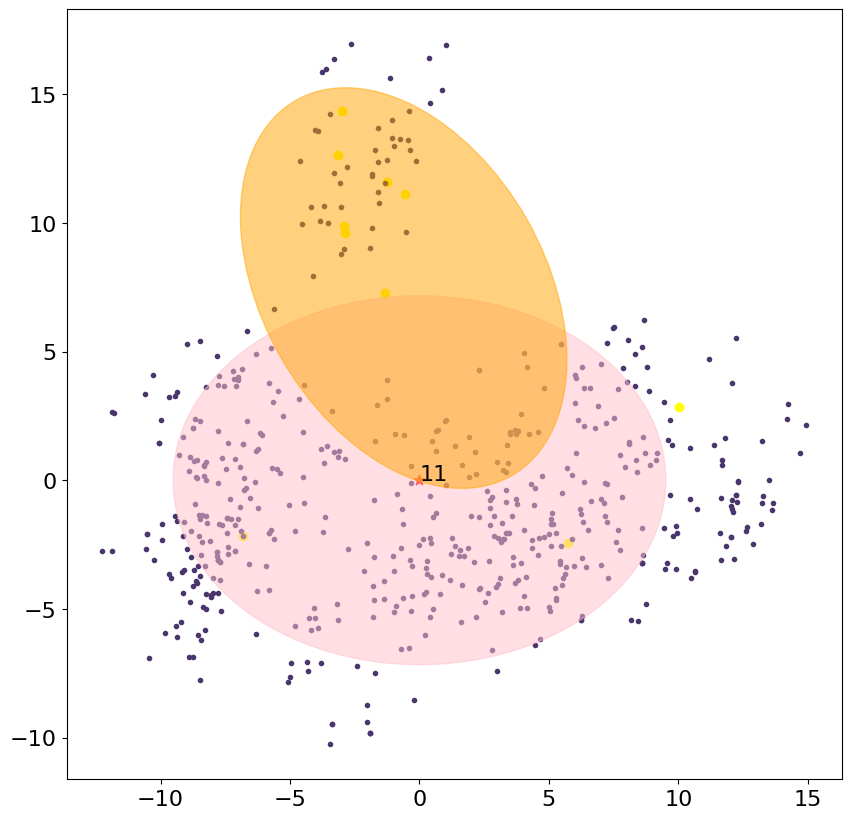

In [208]:
import matplotlib

color = '#4A366D'

fig, ax = plt.subplots()
splot = plt.subplot()
fig.set_size_inches(10, 10)

for i, c in enumerate(class_number):
    if c == -1:
        ax.scatter(pca_features[i, 0], pca_features[i, 1], color='red', marker='*',
                   s=60)
        ax.text(pca_features[i, 0], pca_features[i, 1], int(11))
    elif c == 0:
        ax.scatter(pca_features[i, 0], pca_features[i, 1], color='yellow', marker='o')
    else:
        ax.scatter(pca_features[i, 0], pca_features[i, 1], color=color, marker='.')

v, w = np.linalg.eigh(covariance)
v = 2.0 * np.sqrt(2.0) * np.sqrt(v)

u = w[0] / np.linalg.norm(w[0])
angle = np.arctan(u[1] / u[0])
angle = 180.0 * angle / np.pi
ell = matplotlib.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color='pink')
ell.set_clip_box(splot.bbox)
ell.set_alpha(0.5)
splot.add_artist(ell)

v, w = np.linalg.eigh(covariance_few)
v = 2.0 * np.sqrt(2.0) * np.sqrt(v)

u = w[0] / np.linalg.norm(w[0])
angle = np.arctan(u[1] / u[0])
angle = 180.0 * angle / np.pi
ell = matplotlib.patches.Ellipse(mean_few, v[0], v[1], angle=180.0 + angle, color='orange')
ell.set_clip_box(splot.bbox)
ell.set_alpha(0.5)
splot.add_artist(ell)

plt.show()

In [209]:
fig.savefig('output215.pdf')

In [104]:
dataset = 'DOTA_train'
classes = os.listdir(os.path.join('../class_features', dataset))

In [105]:
mean_dict = {}
features_dict = {}
for c in tqdm.tqdm(classes):
    class_features = []
    mean = torch.load(os.path.join('../DOTA_train', c, 'mean.pth'))
    mean_dict[c] = mean.cpu().numpy()

    image_features = torch.load(os.path.join('../DOTA_train', c, 'features.pth'))

    for i, img_f in enumerate(image_features):
        class_features.append(img_f.squeeze().cpu().numpy())
    features_dict[c] = np.array(class_features)

100%|██████████| 16/16 [00:35<00:00,  2.20s/it]


In [106]:
features_dict['15'].shape

(558, 1024)

In [107]:
concentration_dict = {}
for c in tqdm.tqdm(classes):
    concentration_dict[c] = 1 / features_dict[c].shape[0] * (((features_dict[c]-mean_dict[c])**2).sum())**0.5

100%|██████████| 16/16 [00:00<00:00, 20.69it/s]


In [108]:
def normalize_dict_values(d):
    min_val = min(d.values())
    max_val = max(d.values())
    
    normalized_dict = {}
    for key, val in d.items():
        normalized_val = (val - min_val) / (max_val - min_val)
        normalized_dict[key] = normalized_val
    
    return normalized_dict

In [109]:
concentration_dict

{'5': 0.32491593937442315,
 '8': 0.23295385280731543,
 '9': 0.03879702274618068,
 '13': 0.32433413879026335,
 '14': 0.4487615546074133,
 '12': 0.2030130510724837,
 '2': 0.17097450981016651,
 '7': 0.10363445050479589,
 '6': 0.4216544403577853,
 '1': 0.06311326716310223,
 '10': 0.07689112100854766,
 '4': 0.14058208914398623,
 '0': 0.08898073670153817,
 '3': 0.36782962414525444,
 '15': 0.6808640399498479,
 '11': 0.5465108601826313}

In [110]:
concentration_dict = normalize_dict_values(concentration_dict)

In [111]:
concentration_dict

{'5': 0.4456215768166206,
 '8': 0.30239340264934855,
 '9': 0.0,
 '13': 0.4447154399670848,
 '14': 0.638507384551089,
 '12': 0.2557615076405845,
 '2': 0.20586244663313455,
 '7': 0.10098233676757828,
 '6': 0.5962888722722851,
 '1': 0.03787181675025724,
 '10': 0.05933040826216949,
 '4': 0.15852716876985873,
 '0': 0.07815961980716249,
 '3': 0.5124583455977506,
 '15': 1.0,
 '11': 0.790748977649791}

<BarContainer object of 16 artists>

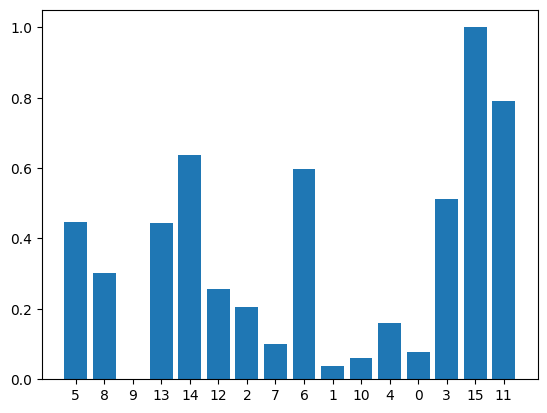

In [112]:
plt.bar(concentration_dict.keys(), concentration_dict.values())

In [113]:
distances = np.zeros((len(classes), len(classes)))
for ci in classes:
    for cj in classes:
        distances[int(ci), int(cj)] = (((mean_dict[ci] - mean_dict[cj])**2).sum())**0.5

In [114]:
distances = distances / distances.max()

In [115]:
distances

array([[0.        , 0.49745898, 0.65389687, 0.50218367, 0.54473308,
        0.46882761, 0.4694331 , 0.31608249, 0.54017136, 0.53486652,
        0.49058952, 0.76592875, 0.45948028, 0.57433439, 0.45615108,
        0.43744684],
       [0.49745898, 0.        , 0.52422389, 0.55874208, 0.67018827,
        0.52125576, 0.50915998, 0.39029754, 0.64816487, 0.39435521,
        0.37615246, 0.66610579, 0.53413434, 0.72795927, 0.55867807,
        0.58530061],
       [0.65389687, 0.52422389, 0.        , 0.55575047, 0.68059904,
        0.53485302, 0.54360204, 0.60562535, 0.72525791, 0.59564178,
        0.60408432, 0.49397499, 0.63275304, 0.85186551, 0.5979382 ,
        0.72258594],
       [0.50218367, 0.55874208, 0.55575047, 0.        , 0.49635287,
        0.27801459, 0.22967938, 0.39383073, 0.50499674, 0.68633015,
        0.6230686 , 0.54865019, 0.58157631, 0.85859086, 0.29704118,
        0.6561663 ],
       [0.54473308, 0.67018827, 0.68059904, 0.49635287, 0.        ,
        0.32333589, 0.42185258, 

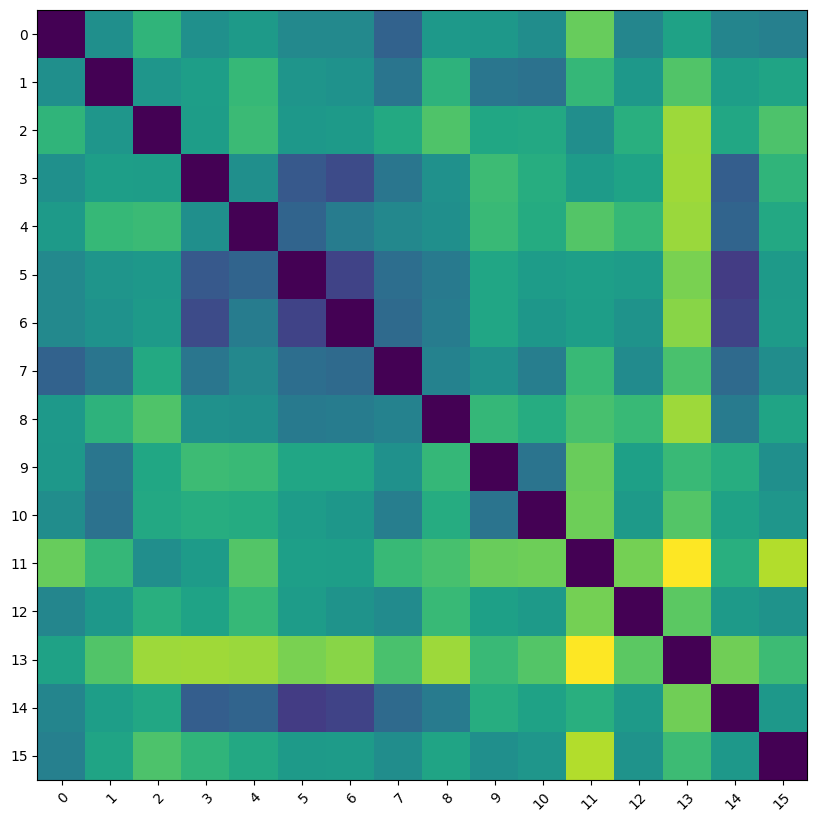

In [116]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
im = ax.imshow(distances)

ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.show()

In [117]:
clustering_matrix = np.zeros((len(classes), len(classes)))
for ci in classes:
    for cj in classes:
        if ci == cj:
            clustering_matrix[int(ci), int(cj)] = 0
        else:
            clustering_matrix[int(ci), int(cj)] = (concentration_dict[ci] + concentration_dict[cj]) / distances[int(ci), int(cj)]

In [118]:
clustering = {}
for c in classes:
    clustering[c] = max(clustering_matrix[int(c)])

<BarContainer object of 16 artists>

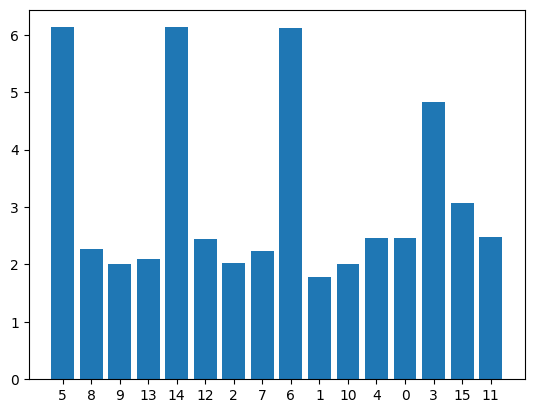

In [119]:
plt.bar(clustering.keys(), clustering.values())

In [120]:
db = np.array(list(clustering.values())).sum() / len(classes)
db

3.1585499143646

In [88]:
dataset = 'COCO_train'
classes = os.listdir(os.path.join('../class_features', dataset))

In [89]:
mean_dict = {}
features_dict = {}
for c in tqdm.tqdm(classes):
    class_features = []
    mean = torch.load(os.path.join('../COCO_train', c, 'mean.pth'))
    mean_dict[c] = mean.cpu().numpy()

    image_features = torch.load(os.path.join('../COCO_train', c, 'features.pth'))

    for i, img_f in enumerate(image_features):
        class_features.append(img_f.squeeze().cpu().numpy())
    features_dict[c] = np.array(class_features)

100%|██████████| 80/80 [01:19<00:00,  1.00it/s]


In [90]:
features_dict['15'].shape

(4766, 1024)

In [91]:
concentration_dict = {}
for c in tqdm.tqdm(classes):
    concentration_dict[c] = 1 / features_dict[c].shape[0] * (((features_dict[c] - mean_dict[c]) ** 2).sum()) ** 0.5

100%|██████████| 80/80 [00:00<00:00, 98.35it/s] 


In [92]:
def normalize_dict_values(d):
    min_val = min(d.values())
    max_val = max(d.values())

    normalized_dict = {}
    for key, val in d.items():
        normalized_val = (val - min_val) / (max_val - min_val)
        normalized_dict[key] = normalized_val

    return normalized_dict

In [93]:
concentration_dict

{'78': 1.3853716080988066,
 '64': 0.4585876222424316,
 '76': 0.5210500758370121,
 '36': 0.28453698225157315,
 '5': 0.21786641752709826,
 '33': 0.23807023560366614,
 '20': 0.21371206424512953,
 '58': 0.19903418004927476,
 '19': 0.2080990185374824,
 '8': 0.20178192968590658,
 '74': 0.3459667366891929,
 '9': 0.22224594510050558,
 '70': 1.1048827866440052,
 '32': 0.38057972350972313,
 '13': 0.2003919762343462,
 '14': 0.21525405349659413,
 '21': 0.3598471647795898,
 '63': 0.23030865933350367,
 '51': 0.24249101987885058,
 '53': 0.22751740815323138,
 '12': 0.6046845691350133,
 '67': 0.3509495337524431,
 '18': 0.20545394258816552,
 '62': 0.20275010504155108,
 '49': 0.3021448309049974,
 '68': 0.3719757932865937,
 '37': 0.28387452539393454,
 '29': 0.48860540709266503,
 '2': 0.1083277234688235,
 '61': 0.2224532475916429,
 '7': 0.18942364549596394,
 '39': 0.1519842170988497,
 '79': 0.5769685647740946,
 '41': 0.16735617183753979,
 '57': 0.17759192663525356,
 '59': 0.17252616700280554,
 '6': 0.19770

In [94]:
concentration_dict = normalize_dict_values(concentration_dict)

In [95]:
concentration_dict

{'78': 1.0,
 '64': 0.30945237399109143,
 '76': 0.35599320734890216,
 '36': 0.17976707721725982,
 '5': 0.13009077626929094,
 '33': 0.14514466026168432,
 '20': 0.1269953637025589,
 '58': 0.11605885828062344,
 '19': 0.12281307802731212,
 '8': 0.11810620913842841,
 '74': 0.22553844545471496,
 '9': 0.13335396641393124,
 '70': 0.7910075133649684,
 '32': 0.2513286147312252,
 '13': 0.11707055350466064,
 '14': 0.12814430135489244,
 '21': 0.2358807655768673,
 '63': 0.13936150242852946,
 '51': 0.14843859081391034,
 '53': 0.13728173852933936,
 '12': 0.4183093475506847,
 '67': 0.2292511322678477,
 '18': 0.12084222943121102,
 '62': 0.11882759751328564,
 '49': 0.19288670193273325,
 '68': 0.24491781816956656,
 '37': 0.17927347998494148,
 '29': 0.331818653925483,
 '2': 0.04847339153625339,
 '61': 0.13350842769650112,
 '7': 0.1088980398787679,
 '39': 0.08100188630543205,
 '79': 0.397658126439867,
 '41': 0.09245554434648053,
 '57': 0.10008221494485006,
 '59': 0.09630771264279922,
 '6': 0.1150710078556678

<BarContainer object of 80 artists>

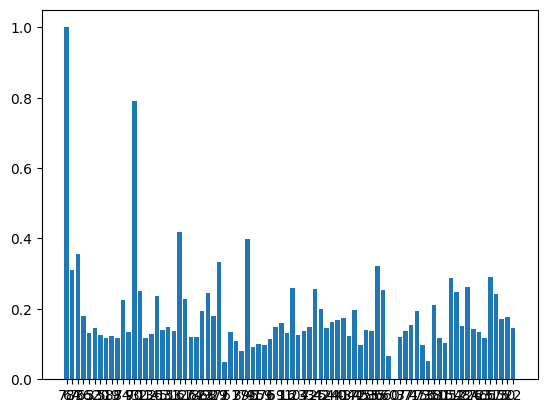

In [96]:
plt.bar(concentration_dict.keys(), concentration_dict.values())

In [97]:
distances = np.zeros((len(classes), len(classes)))
for ci in classes:
    for cj in classes:
        distances[int(ci), int(cj)] = (((mean_dict[ci] - mean_dict[cj]) ** 2).sum()) ** 0.5
distances = distances / distances.max()
distances

array([[0.        , 0.43227979, 0.49163184, ..., 0.54052952, 0.57413925,
        0.51958007],
       [0.43227979, 0.        , 0.52141307, ..., 0.57088949, 0.55724444,
        0.55942543],
       [0.49163184, 0.52141307, 0.        , ..., 0.75152008, 0.73979888,
        0.74412569],
       ...,
       [0.54052952, 0.57088949, 0.75152008, ..., 0.        , 0.34411873,
        0.39228554],
       [0.57413925, 0.55724444, 0.73979888, ..., 0.34411873, 0.        ,
        0.2966528 ],
       [0.51958007, 0.55942543, 0.74412569, ..., 0.39228554, 0.2966528 ,
        0.        ]])

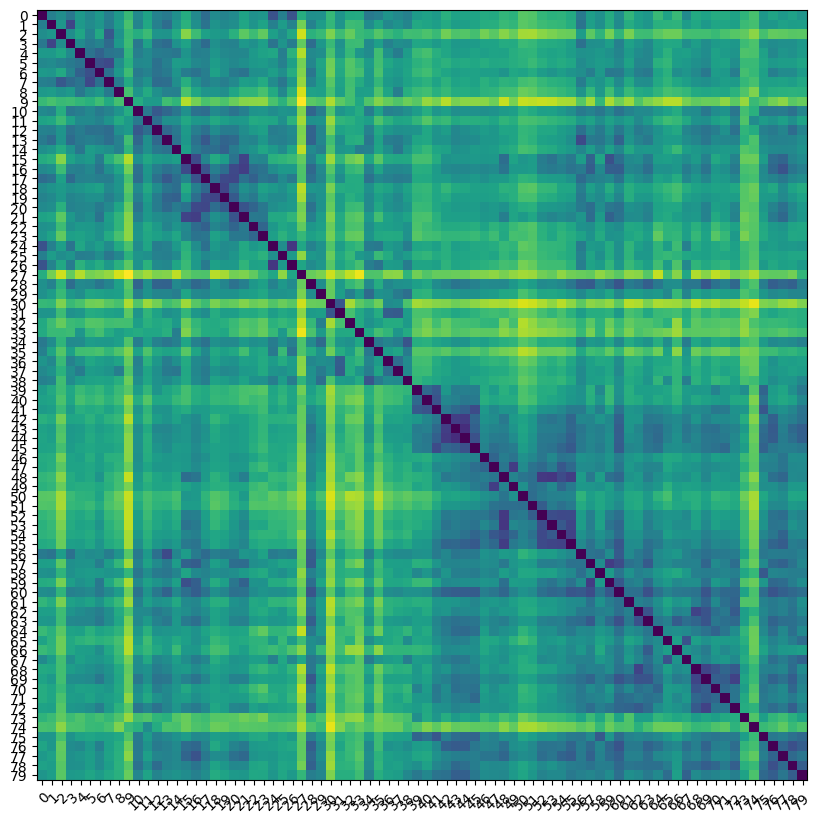

In [98]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
im = ax.imshow(distances)

ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.show()

In [99]:
clustering_matrix = np.zeros((len(classes), len(classes)))
for ci in classes:
    for cj in classes:
        if ci == cj:
            clustering_matrix[int(ci), int(cj)] = 0
        else:
            clustering_matrix[int(ci), int(cj)] = (concentration_dict[ci] + concentration_dict[cj]) / distances[
                int(ci), int(cj)]

In [100]:
clustering = {}
for c in classes:
    clustering[c] = max(clustering_matrix[int(c)])

<BarContainer object of 80 artists>

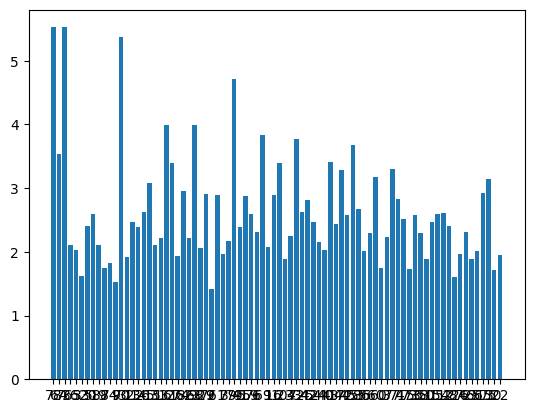

In [101]:
plt.bar(clustering.keys(), clustering.values())

In [103]:
db = np.array(list(clustering.values())).sum() / len(classes)
db

2.6259581944779016